In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import pickle

data = pd.read_csv("insurance.csv")


In [2]:
'''
check data

data.head()
data.tail()
data.shape()
data.info()
data.isnull().sum()
data.describe(include='all')
'''


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [3]:
#convert non-numerical value to numerical
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                                   'northwest':3,'northeast':4})

In [4]:
#Data that will be predicted
predict = 'charges'

In [5]:
#Separate dataset that is meant for prediction
X = data.drop([predict],axis=1)
y = data[predict]

In [6]:
#Split dataset for training and testing (80/20)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
#Train the model on different regression model
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [10]:
#Test the trained model with the test dataset
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rfr.predict(X_test)
y_pred4 = gbr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rfr':y_pred3,'gbr':y_pred4})

In [11]:
df1

,Actual,Lr,svm,rfr,gbr
764,9095.06825,8924.407244,9548.261584,11167.979746,11001.128629
887,5272.17580,7116.295018,9492.515425,5064.969148,5840.174656
890,29330.98315,36909.013521,9648.758701,28414.359558,28001.980112
1293,9301.89355,9507.874691,9555.044136,10252.891621,9745.291602
259,33750.29180,27013.350008,9420.421978,34594.144746,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47012.031731,45431.423211
575,12222.89830,11814.555568,9625.431547,12402.006803,12465.025294
535,6067.12675,7638.107736,9504.168517,6447.905054,6974.336525
543,63770.42801,40959.081722,9605.004594,46827.046939,47862.047791


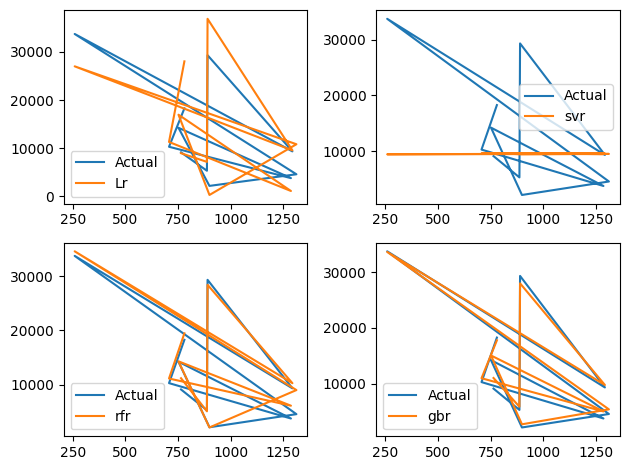

In [12]:
#For better visual understanding we plot the result into a graph
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rfr'].iloc[0:11],label="rfr")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gbr'].iloc[0:11],label="gbr")

plt.tight_layout()

plt.legend()

In [13]:
#Measure the R-Squared of each model
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8591427156333759 0.8779936181637191


In [14]:
#Measure the mean square error of each model
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2537.7579351829527 2447.167158715136


In [15]:
#Create new data to be tested on the trained model
data = {'age' : 25,
        'sex' : 1,
        'bmi' : 25.4,
        'children' : 3,
        'smoker' : 1,
        'region' : 2}

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,25,1,25.4,3,1,2


In [16]:
new_pred = gbr.predict(df)
print("Medical Insurance cost for the customer : ",new_pred[0])

Medical Insurance cost for the customer :  18275.933032652152


In [17]:
#train the model on the entire dataset
gbr = GradientBoostingRegressor()
gbr.fit(X,y)

GradientBoostingRegressor()

In [20]:
#Compare previous trained model with the newly trained model
y_pred = gbr.predict(X_test)
df2 = pd.DataFrame({'Actual':y_test,'Old gbr':y_pred4,'New gbr':y_pred})
print(df2)

fscore = metrics.r2_score(y_test,y_pred)
print(score4, fscore)

           Actual       Old gbr       New gbr
764    9095.06825  11001.128629  10385.188393
887    5272.17580   5840.174656   5972.358287
890   29330.98315  28001.980112  28317.130939
1293   9301.89355   9745.291602   9668.204622
259   33750.29180  33639.100981  34024.467334
...           ...           ...           ...
109   47055.53210  45431.423211  45669.543319
575   12222.89830  12465.025294  12396.626728
535    6067.12675   6974.336525   6941.761334
543   63770.42801  47862.047791  57947.237713
846    9872.70100  10289.655388  10198.429267

[268 rows x 3 columns]
0.8779936181637191 0.920089498882131


In [21]:
new_pred = gbr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  17298.690242619872


In [ ]:
#Saving the model
with open("MedicCostRegression.pickle","wb") as f:
    pickle.dump(gbr,f)

'''
Load the model 
pickle_in = open("MedicCostRegression.pickle","rb")
gbr = pickle.load(pickle_in)
'''